# Rainfall Prediction using Linear Regression 

### Importing all the libraries 

In [38]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Datasets

In [2]:
data = pd.read_csv("austin_weather.csv")
data

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


### Cleaning the Datasets

In [3]:
data = data.drop(["Events", "Date", "SeaLevelPressureLowInches"], axis = 1)
data = data.replace('T', 0)
data = data.replace('-', 0)

### Creating the new Dataset to work on 

In [4]:
data.to_csv("austin_weather_final.csv")

### Reading the New Dataset

In [5]:
data = pd.read_csv("austin_weather_final.csv")
data

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0.00
2,2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0.00
3,3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0.00
4,4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,103,89,75,71,67,61,82,54,25,30.04,29.97,10,10,10,12,5,21,0.00
1315,1315,105,91,76,71,64,55,87,54,20,29.97,29.90,10,10,10,14,5,20,0.00
1316,1316,107,92,77,72,64,55,82,51,19,29.91,29.86,10,10,10,12,4,17,0.00
1317,1317,106,93,79,70,68,63,69,48,27,29.96,29.91,10,10,10,13,4,20,0.00


In [9]:
X = data.drop(['PrecipitationSumInches'], axis = 1)
Y = data["PrecipitationSumInches"]

In [10]:
Y = Y.values.reshape(-1,1)
Y

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]], shape=(1319, 1))

In [13]:
day_index = 798
days = [ i for i in range(Y.size)]

In [ ]:
#Initialize Linear Regression Classifier
clf = LinearRegression()

#Traning the Classifier
clf.fit(X,Y)

The Precipitationn Trend Graph


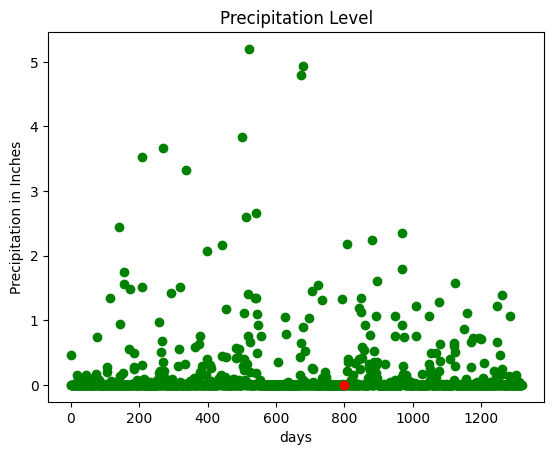

In [37]:
#Plot the Graphs
print("The Precipitationn Trend Graph")
plt.scatter(days, Y, color='g')
plt.scatter(days[day_index], Y[day_index], color = 'r')
plt.title("Precipitation Level")
plt.xlabel("days")
plt.ylabel("Precipitation in Inches")
plt.show()

The Precipitation VS Attributes trend Graph:


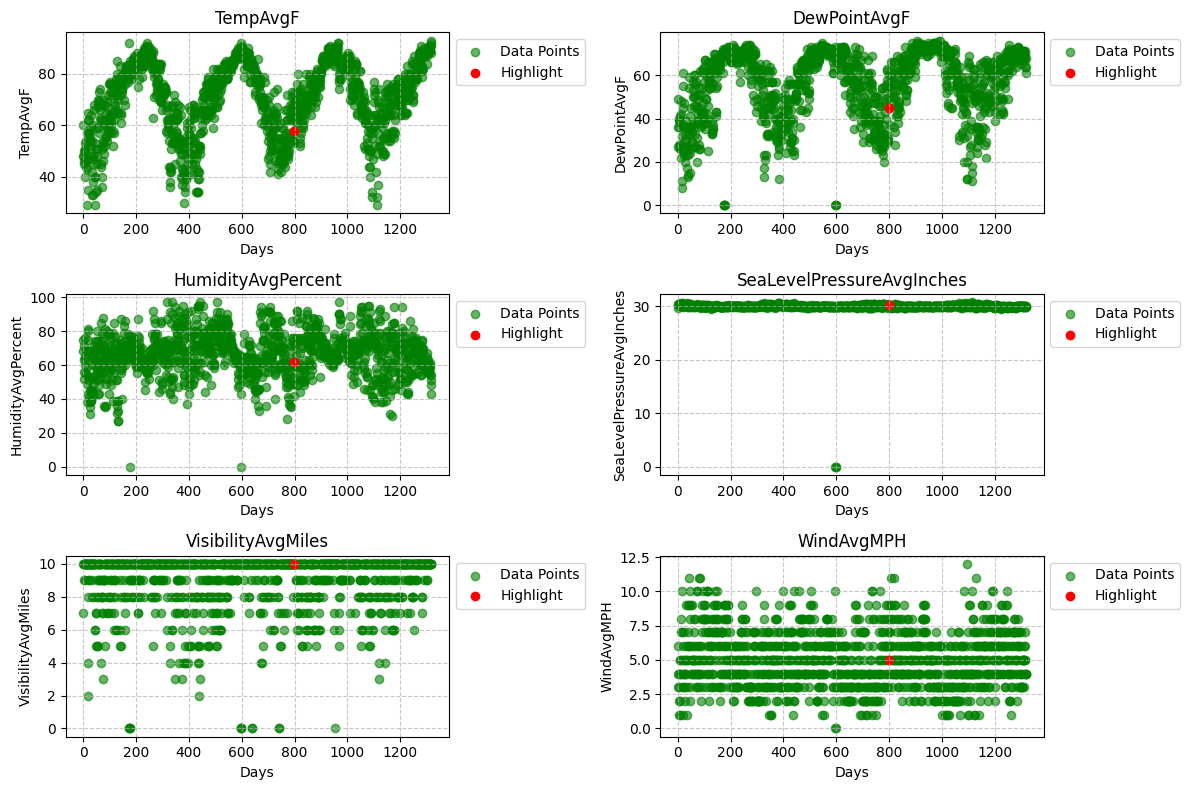

In [35]:
x_vis = X.filter(["TempAvgF", "DewPointAvgF", "HumidityAvgPercent", "SeaLevelPressureAvgInches", "VisibilityAvgMiles", "WindAvgMPH"])
print("The Precipitation VS Attributes trend Graph:")
plt.figure(figsize=(12, 8))
for i in range (x_vis.columns.size):
    plt.subplot( 3, 2, i + 1 )
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]], color = 'g', alpha=0.6, label='Data Points')
    plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index], color='r', label='Highlight')
    plt.title(x_vis.columns.values[i])
    plt.xlabel('Days')
    plt.ylabel(x_vis.columns.values[i])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

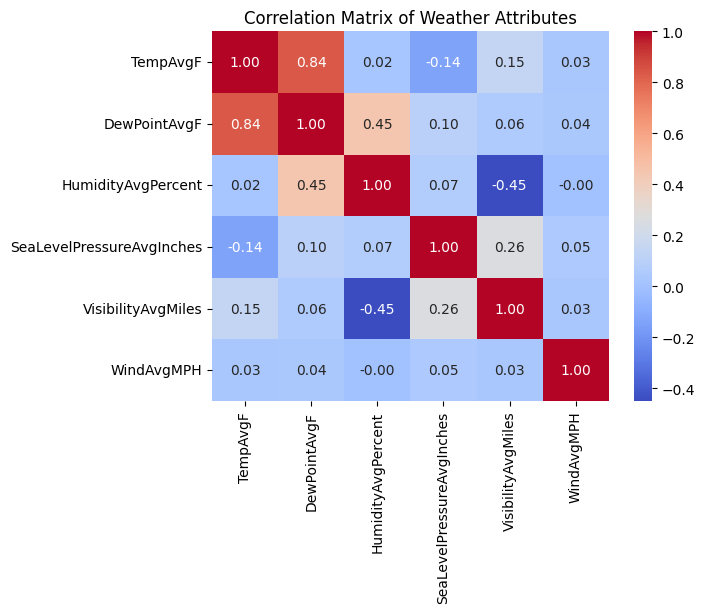

In [39]:
# Calculating the Correlation matrix
corr_matrix = x_vis.corr()

#Plotting the Heatmap
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Weather Attributes")
plt.show()